<a href="https://colab.research.google.com/github/appliedgeometry/Geometria-Analitica/blob/master/5_2_Gifs_de_curvas_polares_con_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gifs con Matplotlib

A continucación mostramos como crear un gif de una gráfica polar. Tomando como ejemplo la espiral de Arquímides. 

### Importamos las módulos necesarios

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter 
from matplotlib.cm import get_cmap
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

###Crear un plano polar

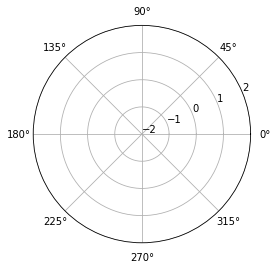

In [ ]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='polar')
ax.set_ylim([-2, 2])
ax.set(yticks=np.r_[-2:3])
fig.show()

## Espiral de Arquímides

$$r=a\theta$$

### Definimos la malla y la ecuación asociada.

In [ ]:
# Definimos las variables goblales 
PARTICION = 100
# Aquí puede poner el nombre que desee para su archivo 
NAME = "Arquimides" 


# Definimos las ecuaciones y la malla a utilizar. 
# Aqui debemos tener presente los valores del intervalo a fragmentar 
theta = np.linspace(0, 10*np.pi, PARTICION) 
a = 5 
r = a*theta

### Gráfica simple

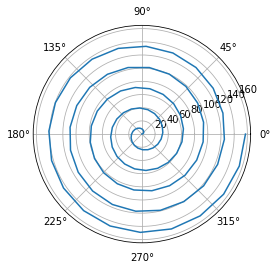

In [ ]:
plt.polar(theta, r)
plt.show()

### Hacemos la Animación 

In [ ]:
# Definimos una funcion auxiliar 
def fragmentar_array(numpy_array):
  """ Este funcion toma un numpy array  
      [[a, b , c, d]] y lo conviernte en 
      numpy array de la forma
      [
        [a, None, None, None],
        [a, b, None, None],
        [a, b, c, None],
        [a, b, c, d],
      ]
  """
  resultado = []
  list_ = numpy_array.tolist()
  for i in list_:
    index = list_.index(i)
    complemento = numpy_array.shape[0] - index - 1
    partial_list = list_[0:index+1] + [None for i_ in range(complemento)]
    resultado.append(partial_list)
  return np.array(resultado) 

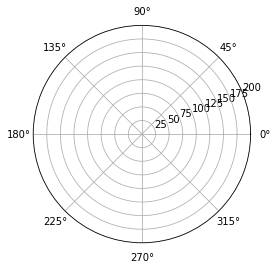

In [ ]:
# Definimos las propiedades de la figura
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='polar')
ax.set_ylim([0, 2])
"""
  Ojo en la funcion set_ylim debemos tener cuidado con este límite
  para que la animación salga completa 
"""
ax.set_ylim(0, 200) 
theta_np = fragmentar_array(theta)
r_np = fragmentar_array(r)

"""
  Definimos una función para crear la animación, aquí
  extraemos cada componente i del np_array, es decir, 
  np_array[i,:] para mostrar como se va formando una curva.
"""
l,  = ax.plot([],[])
def animacion(i):
  l.set_data(theta_np[i,:], r_np[i,:] )
  return l, 

"""
El parametro `Interval` define la velocidad a la cual 
se repoducirá el gif. 
"""
# Creamos la animación 
anim = FuncAnimation(
    fig, animacion,
    frames=PARTICION, interval=15, 
    repeat=True
)

### Obtenemos el archivo en formato mp4

In [ ]:
# Creamos un video 
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

**OBSERVACIÓN**. 

Dando clíck en los tres puntos del video se puede descargar como un archivo mp4.

### Obtenemos el archivo en formato gif

In [ ]:
# Guardamos el archivo en formato gif
anim.save(f'{NAME}.gif', writer='pillow')

**OBSERVACIÓN**. 

Ahora busque su archivo en la parte izquierda de este google colab para descargarlo, dando click en el icono de la carpeta.